<a href="https://colab.research.google.com/github/iampro3/DAE/blob/main/0501_img_noise_del.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt

plt.style.available
plt.style.use('seaborn-v0_8-white')

In [4]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

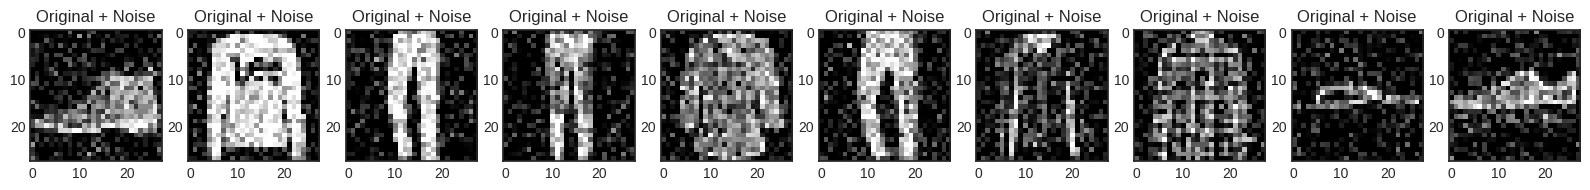

In [8]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
  ax = plt.subplot(1,n,i+1)
  plt.title("Original + Noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

## 모델 정의

In [10]:
from IPython.utils.py3compat import decode
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()

    self.encoder = Sequential([Input(shape=(28, 28, 1)),
                              Conv2D(16,(3,3), activation='relu', padding='same', strides=2),
                               Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    self.decoder = Sequential([Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                               Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                               Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decode

In [12]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

In [17]:
autoencoder.fit(x_train_noisy, x_train, 
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10


NotImplementedError: ignored

## 인코더 요약

In [ ]:
autoencoder.encoder.summary()

## 디코더 요약

In [ ]:
autoencoder.decoder.summary()

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n =10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.totle('Original + Noise')
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  bx=plt.subplot(2,n,i+1+n)
  plt.totle('Reconstructed (Denoise)')
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.gray()
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)
plt.show()